In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

# Dossier contenant les fichiers CSV
data_folder = 'data'

# Initialiser une liste pour stocker les DataFrames
dfs = []

# Boucler sur tous les fichiers CSV dans le dossier
for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        # Construire le chemin complet du fichier
        file_path = os.path.join(data_folder, file)
        # Charger le fichier CSV dans un DataFrame
        df = pd.read_csv(file_path)
        # Ajouter le DataFrame à la liste
        dfs.append(df)

# Combiner tous les DataFrames en un seul
combined_df = pd.concat(dfs, ignore_index=True)

# Convertir les dates en datetime et calculer le chiffre d'affaires
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
combined_df['Revenue'] = combined_df['Quantity'] * combined_df['Product Price']

# Agréger les données par semaine
weekly_revenue = combined_df.groupby(pd.Grouper(key='Order Date', freq='W'))['Revenue'].sum().reset_index()

18:08:12 - cmdstanpy - INFO - Chain [1] start processing
18:08:12 - cmdstanpy - INFO - Chain [1] done processing


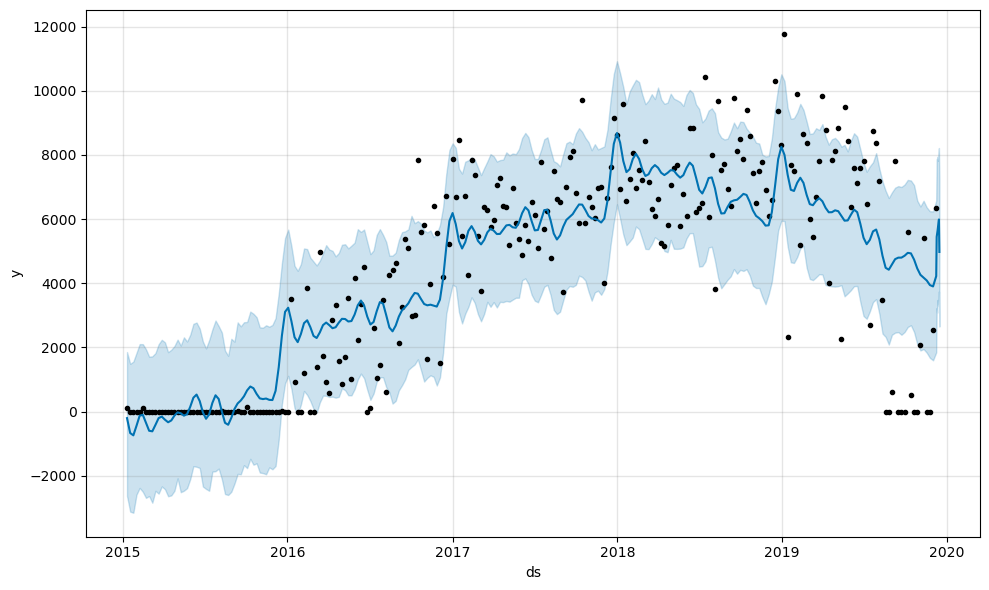

In [2]:
# Préparer les données pour Prophet
df_for_prophet = weekly_revenue.rename(columns={'Order Date': 'ds', 'Revenue': 'y'}).dropna()

# Initialiser et entraîner le modèle Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(df_for_prophet)

# Faire des prédictions pour les 7 prochains jours
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualiser les prévisions
model.plot(forecast)
plt.show()

In [4]:
# Comparer les prévisions avec les données réelles (si disponibles)
from sklearn.metrics import mean_squared_error
import numpy as np

# Utiliser le DataFrame correct pour obtenir les vraies valeurs
y_true = df_for_prophet['y'].values[-7:]  # Les dernières 7 valeurs de l'ensemble d'entraînement
y_pred = forecast['yhat'].values[-7:]  # Les dernières 7 valeurs prédites

# Calculer le RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

RMSE: 4192.55174866872
